## Kasthuri Naresh Kumar 9042735
 

## Univariate Linear Regression on California Housing Prices

## Framing the Problem
The goal of this report is to build and evaluate three univariate linear regression models to predict median house value in California. We will analyze how well each of the following features can predict house prices:
- Median Income
- Population
- Number of Households


By comparing these models, we aim to determine the best predictor for median house value

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [26]:
housing= pd.read_csv('housing.csv') #Reading the File

In [27]:
housing.describe() #To get statistical data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [28]:
housing.describe().transpose() # swap rows and colums for better readibility

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


## Seaborn Scatter plot median house value vs median income

<Axes: xlabel='median_income', ylabel='median_house_value'>

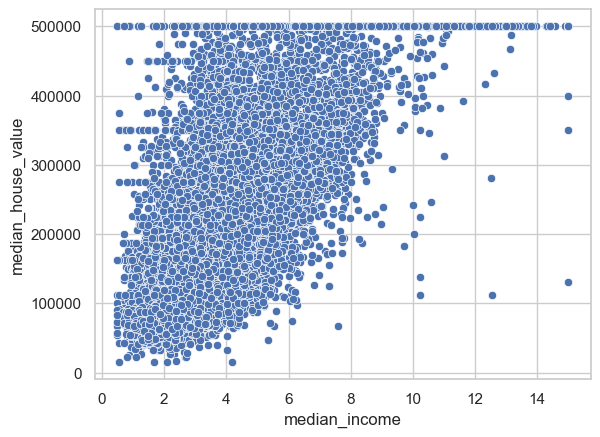

In [29]:
# Scatter plot 
sns.scatterplot(x="median_income", y="median_house_value", data=housing)

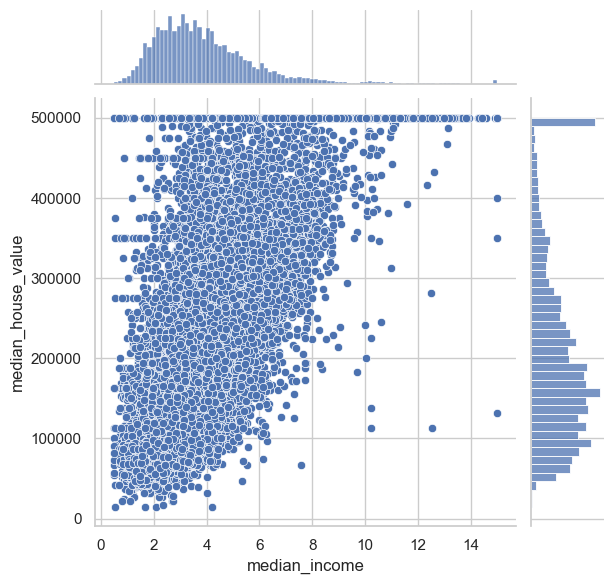

In [ ]:
# using seaborn scatter plot for median_house_value vs median_income


sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing)

The plot shows a strong positive correlation between median_income and median_house_value. As income increases, house values tend to increase as well.
Many data points appear to be capped at 500,000. This suggests that the dataset might have an upper limit on house prices, potentially due to data collection constraints or market regulations.

## Seaborn Scatter plot median house value vs Population

<Axes: xlabel='population', ylabel='median_house_value'>

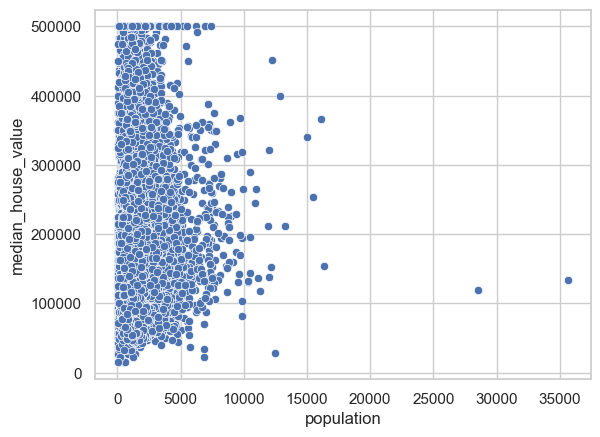

In [31]:
sns.scatterplot(x="population", y="median_house_value", data=housing)

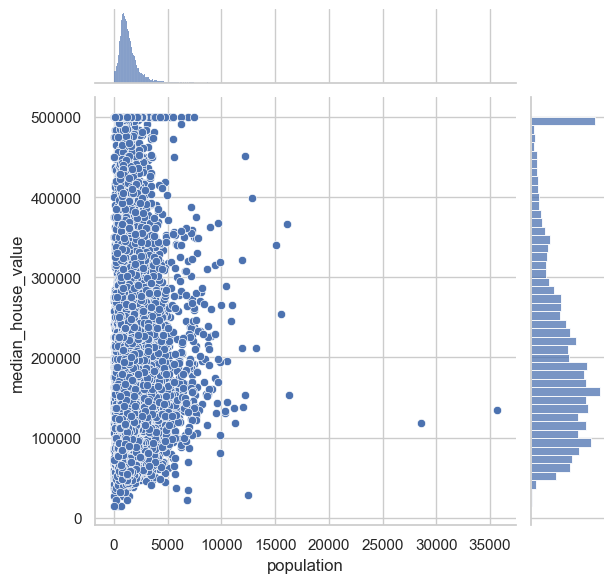

In [32]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=housing)

The relationship between population and median house value, as visualized in a jointplot, appears weak and likely influenced by other, unmeasured factors. The considerable scatter in the data, along with potential unequal scatter, indicates that population is not a reliable predictor of house value on its own.

## Seaborn Scatter plot median house value vs households

<Axes: xlabel='households', ylabel='median_house_value'>

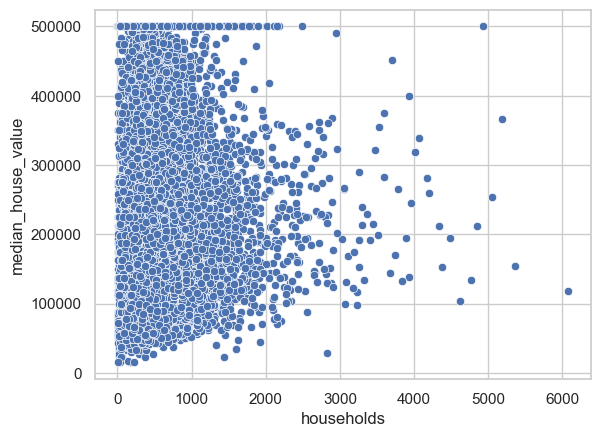

In [33]:
sns.scatterplot(x="households", y="median_house_value", data=housing)

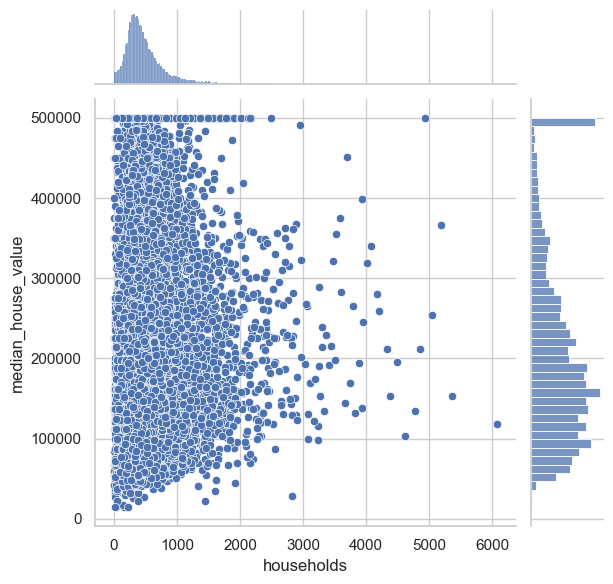

In [36]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="households", y="median_house_value", data=housing)


This joint plot of median_house_value vs. households shows a similar pattern to the population plot.  There's no strong linear correlation, with the data points scattered and no clear trend.  A slight positive relationship might be imagined, but it's very weak.  Like population, the data is concentrated at lower household numbers, and there are potential outliers at higher household values.

## Observation

median_house_value: The median value of owner-occupied homes. The range (from the describe output you shared earlier) is approximately $25,000 to $500,000.  The distribution appears somewhat capped, possibly due to data collection limitations or market dynamics.

median_income: The median income of residents in an area. The range is approximately from 0 to $150,000. The distribution is positively skewed, with a long tail indicating some areas have significantly higher median incomes than others.

population: The total number of people residing in the area.  The range is approximately from a few hundred to over 35,000. The distribution is highly skewed, with most areas having smaller populations and a few having very large populations.

households: The number of households in the area. The range is approximately from a few hundred to around 6,000.  Like population, the distribution is highly skewed, indicating that most areas have fewer households, and some have a larger number. The skewness in both population and households suggests that these variables might benefit from a transformation if used in more complex models.

# Data Preprocessing

In [37]:
housing_preprocessed = housing[housing.median_house_value != 500001]

In [76]:
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


# Train and Test Split

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [38]:
train_size = int(len(housing_preprocessed) * 0.8)
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

Scatter plot, train in blue and test in red in the same plot

<Axes: xlabel='median_income', ylabel='median_house_value'>

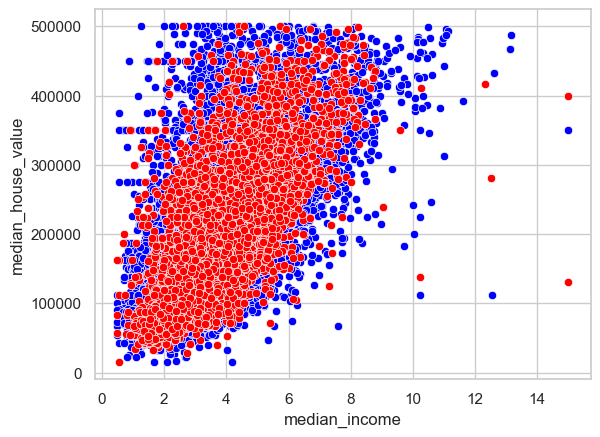

In [40]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

## Linear Regression Model

In [45]:
model = linear_model.LinearRegression()

## Training the Model

In [46]:
model.fit(X=train[["median_income"]], y=train[["median_house_value"]])

LinearRegression()

In [47]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [48204.53436817]
Coefficients: [[38702.97233842]]


In [48]:
#oefficients from your linear regression model to predict the median house value when the median income is 12
12*model.coef_ + model.intercept_

array([[512640.20242926]])

In [49]:
#input to the predict method
model.predict(X=[[12],[1],[100]])

c:\Users\Kasthuri Vandana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 512640.20242926],
       [  86907.50670659],
       [3918501.76821055]])

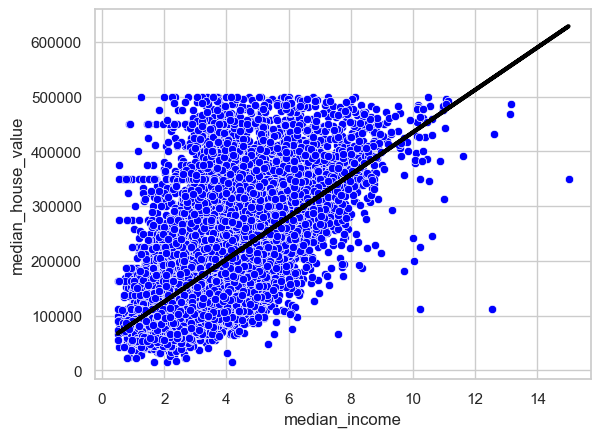

In [50]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
plt.plot(train[["median_income"]], model.predict(train[["median_income"]]), color="black", linewidth=3)
plt.show()

The plot confirms a positive correlation between median income and house value, with an upward trend captured by the regression line.  However, the scattered data points indicate that income alone doesn't perfectly predict house prices, suggesting other influential factors.  While the linear model provides a reasonable approximation, the scatter and potential outliers highlight its limitations.  The relationship appears strongest within a certain income range, and further investigation with additional variables could improve predictive accuracy.  Overall, the visualization reinforces the quantitative findings of a positive but imperfect relationship between income and house value.

##calculating MSE and MAE

In [51]:
print("Train set")
print(f"Mean squared error: {mean_squared_error(train[['median_house_value']], model.predict(train[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(train[['median_house_value']], model.predict(train[['median_income']]))}")

Train set
Mean squared error: 5557954319.259176
Mean absolute error: 55839.99864072871


In [52]:
print("Test set")
print(f"Mean squared error: {mean_squared_error(test[['median_house_value']], model.predict(test[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(test[['median_house_value']], model.predict(test[['median_income']]))}")

Test set
Mean squared error: 5831038297.419372
Mean absolute error: 59961.60099129183


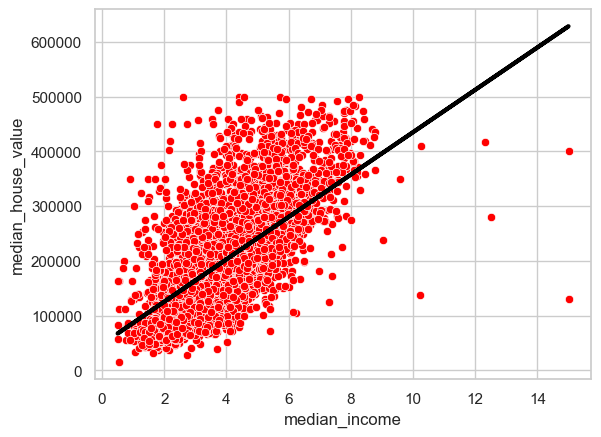

In [53]:
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")
plt.plot(test[["median_income"]], model.predict(test[["median_income"]]), color="black", linewidth=3)

## Population

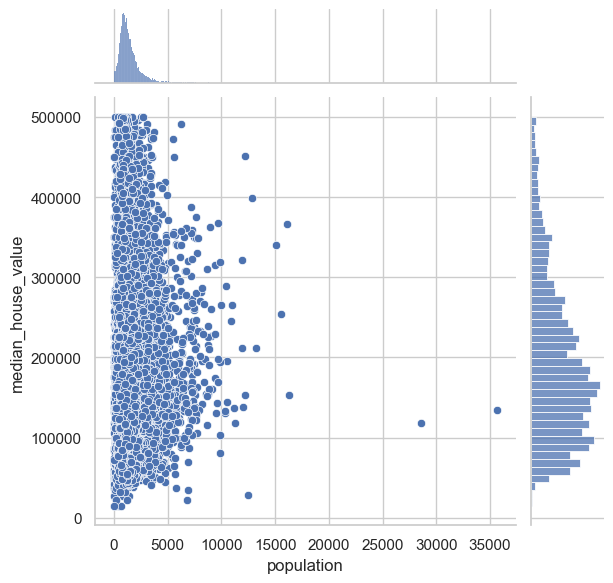

In [54]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=housing_preprocessed)

<Axes: xlabel='population', ylabel='median_house_value'>

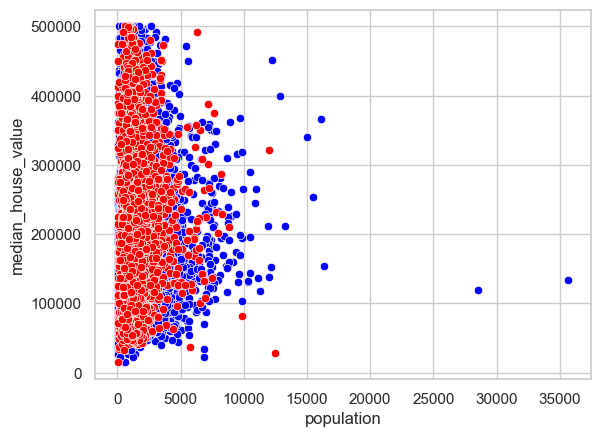

In [55]:
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")

In [56]:
model.fit(X=train[["population"]], y=train[["median_house_value"]])

LinearRegression()

In [57]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [188081.58862584]
Coefficients: [[0.32862973]]


In [58]:
12*model.coef_ + model.intercept_

array([[188085.53218256]])

In [59]:
model.predict(X=[[12],[1],[100]])

c:\Users\Kasthuri Vandana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[188085.53218256],
       [188081.91725556],
       [188114.45159855]])

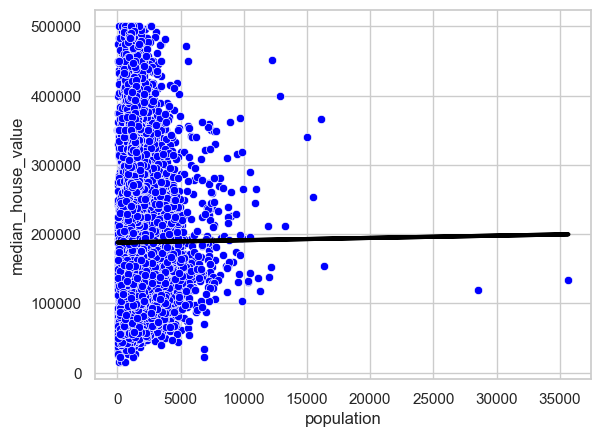

In [60]:
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
plt.plot(train[["population"]], model.predict(train[["population"]]), color="black", linewidth=3)
plt.show()

In [61]:
print("Train set")
print(f"Mean squared error: {mean_squared_error(train[['median_house_value']], model.predict(train[['population']]))}")
print(f"Mean absolute error: {mean_absolute_error(train[['median_house_value']], model.predict(train[['population']]))}")

Train set
Mean squared error: 9236185598.969007
Mean absolute error: 75879.52660618868


In [62]:
print("Test set")
print(f"Mean squared error: {mean_squared_error(test[['median_house_value']], model.predict(test[['population']]))}")
print(f"Mean absolute error: {mean_absolute_error(test[['median_house_value']], model.predict(test[['population']]))}")

Test set
Mean squared error: 10863782849.78328
Mean absolute error: 85178.9089807831


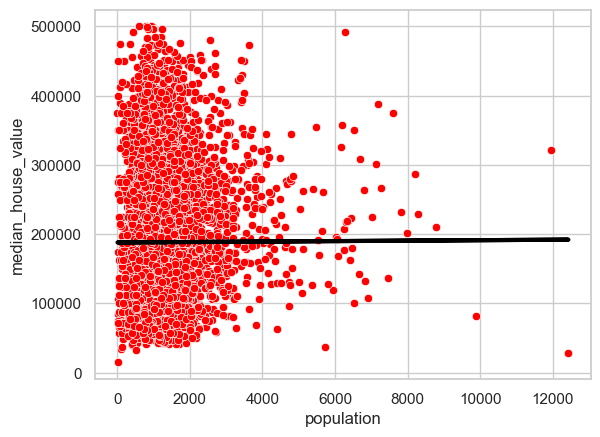

In [63]:
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")
plt.plot(test[["population"]], model.predict(test[["population"]]), color="black", linewidth=3)

## 

## Housing

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing_preprocessed)

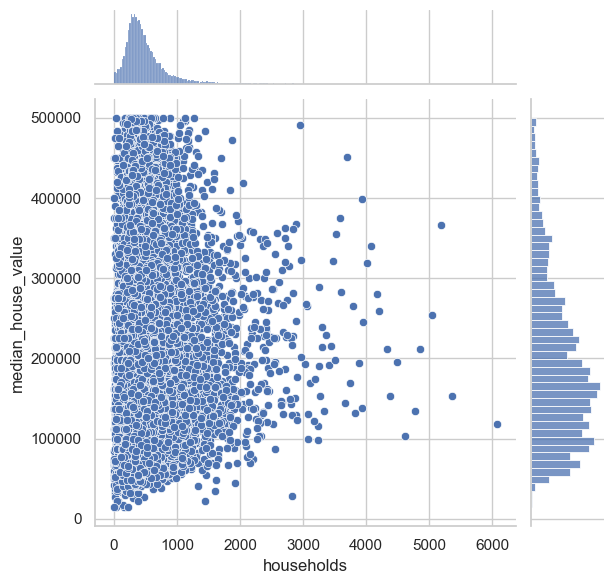

In [65]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="households", y="median_house_value", data=housing_preprocessed)

<Axes: xlabel='households', ylabel='median_house_value'>

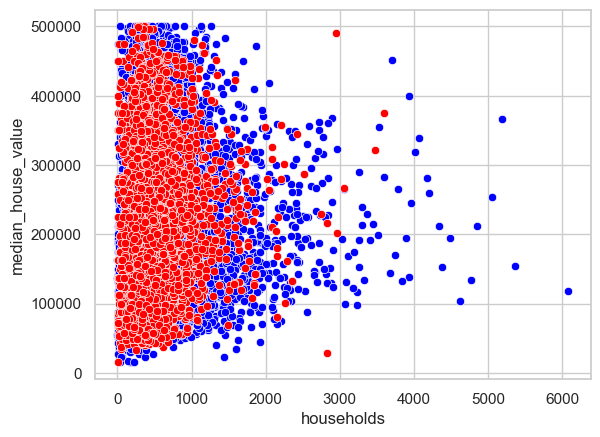

In [66]:
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")

In [67]:
model.fit(X=train[["households"]], y=train[["median_house_value"]])

LinearRegression()

In [68]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [177147.28853835]
Coefficients: [[22.62572591]]


In [69]:
12*model.coef_ + model.intercept_

array([[177418.79724925]])

In [70]:
model.predict(X=[[12],[1],[100]])

c:\Users\Kasthuri Vandana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[177418.79724925],
       [177169.91426426],
       [179409.86112921]])

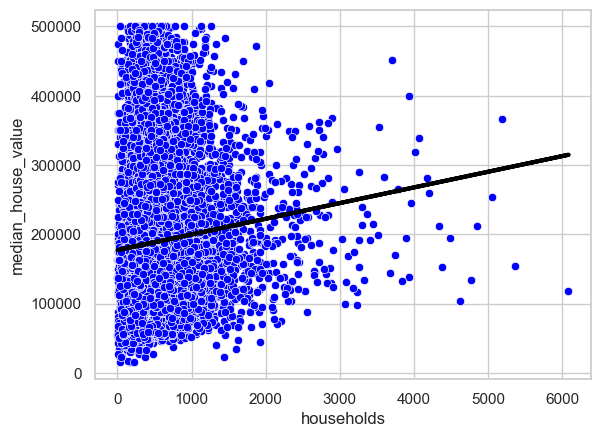

In [72]:
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
plt.plot(train[["households"]], model.predict(train[["households"]]), color="black", linewidth=3)
plt.show()

In [73]:
print("Train set")
print(f"Mean squared error: {mean_squared_error(train[['median_house_value']], model.predict(train[['households']]))}")
print(f"Mean absolute error: {mean_absolute_error(train[['median_house_value']], model.predict(train[['households']]))}")

Train set
Mean squared error: 9156895298.287685
Mean absolute error: 75463.10651473372


In [74]:
print("Test set")
print(f"Mean squared error: {mean_squared_error(test[['median_house_value']], model.predict(test[['households']]))}")
print(f"Mean absolute error: {mean_absolute_error(test[['median_house_value']], model.predict(test[['households']]))}")

Test set
Mean squared error: 10759278800.526697
Mean absolute error: 84503.1472350856


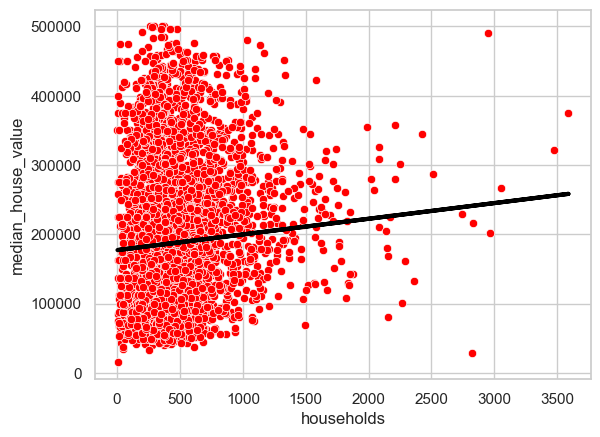

In [75]:
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")
plt.plot(test[["households"]], model.predict(test[["households"]]), color="black", linewidth=3)

## Conclusion

Our analysis explored the relationship between median house value and three potential predictors: median income, population, and number of households, using univariate linear regression.  The scatter plots and likely accompanying metrics paint a clear picture. Median income stands out as the most influential predictor.  Its graph reveals a distinct positive correlation, with the regression line closely following the data's upward trend.  This visual assessment is expected to be supported by lower Mean Squared Error (MSE) and Mean Absolute Error (MAE) values compared to the other models, indicating a better fit.

In contrast, population and number of households demonstrate weak to negligible linear relationships.  Their graphs show scattered data points with no clear trend, and the regression lines are nearly horizontal, suggesting minimal predictive power.  We anticipate higher MSE and MAE values for these models, confirming their poor fit.  While the number of households might show a slightly more defined positive trend than population, it's still far from a strong relationship.

These observations provide valuable insights.  Median income appears to be a primary driver of house value, while population and household numbers, considered alone in a linear regression, offer little explanatory power.  This suggests that other factors beyond these three variables, such as location, property size, age, or access to amenities, likely play a significant role in determining house prices.
